In [15]:
import torch
from torchvision import transforms
from animal_keypoints_dataset import AnimalKeypointsDataset, RandomRotation, RandomFlip, RandomRatioCrop
import matplotlib.pyplot as plt

In [16]:
%cd ..
from visualization.keypoints import show_keypoints
%cd ./data_loading

/home/technik/coding/pycharm/pytorch_course_animal_pose_estimation
/home/technik/coding/pycharm/pytorch_course_animal_pose_estimation/data_loading


In [17]:
image_size = (128, 128)
data = AnimalKeypointsDataset(
    json_file_path='../dataset/cats/keypoints_annotations.json',
    image_dir='../dataset/cats/labeled/')

0 480x281 (16, 3)
1 480x318 (16, 3)
2 480x320 (16, 3)
3 400x320 (16, 3)
4 480x320 (16, 3)
5 318x320 (16, 3)
6 825x703 (16, 3)
7 480x252 (16, 3)
8 3024x4032 (16, 3)


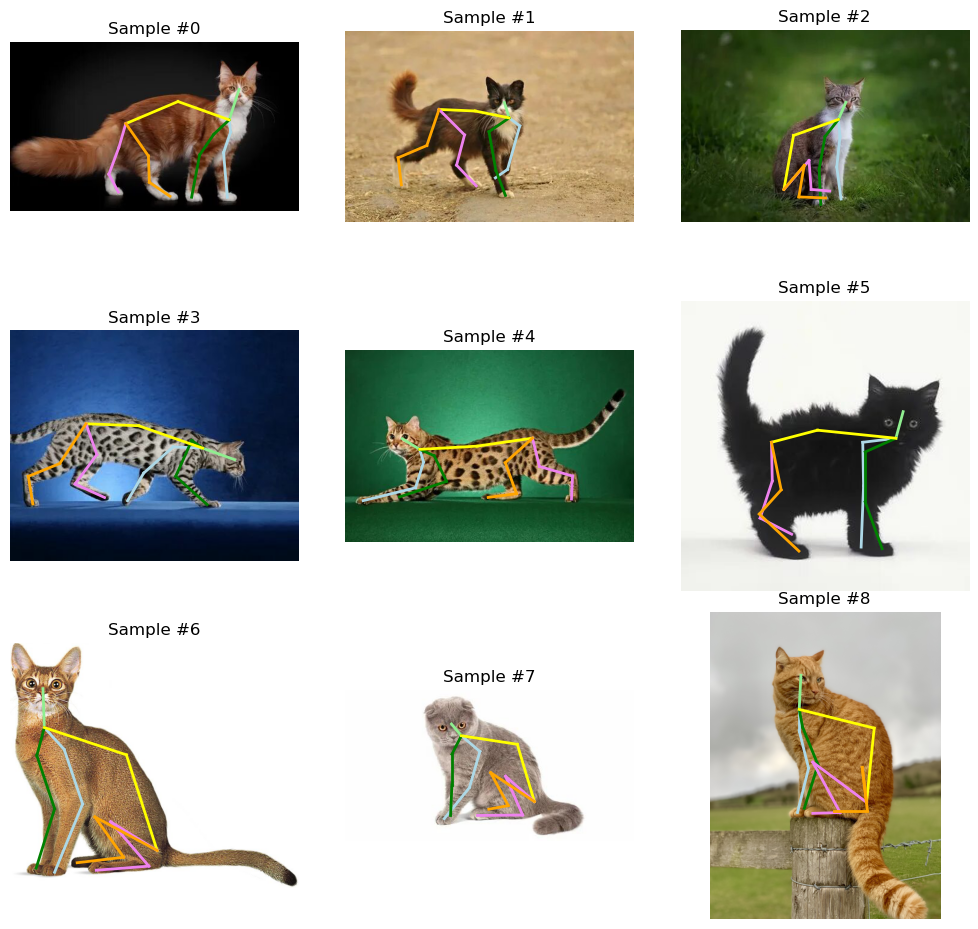

In [18]:
fig = plt.figure(figsize=(10, 10))

for i in range(9):
    sample = data[i]

    print(i, '{}x{}'.format(sample['image'].width, sample['image'].height),
          sample['keypoints'].shape)

    ax = plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_keypoints(sample['image'], sample['keypoints'], True)
plt.show()

In [19]:
all_tform = transforms.Compose([
    RandomFlip(0.5, 0.5),
    RandomRatioCrop(0.1, 0.1, 0.9, 0.9),
    RandomRotation((-45, 45)),
])

img_tform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor()
])

data = AnimalKeypointsDataset(
    json_file_path='../dataset/cats/keypoints_annotations.json',
    image_dir='../dataset/cats/labeled/',
    transform={
        'all': all_tform,
        'image': img_tform,
        'keypoints': transforms.ToTensor()}
)

0 torch.float32 torch.Size([3, 128, 128]) torch.Size([1, 16, 3])
1 torch.float32 torch.Size([3, 128, 128]) torch.Size([1, 16, 3])
2 torch.float32 torch.Size([3, 128, 128]) torch.Size([1, 16, 3])
3 torch.float32 torch.Size([3, 128, 128]) torch.Size([1, 16, 3])
4 torch.float32 torch.Size([3, 128, 128]) torch.Size([1, 16, 3])
5 torch.float32 torch.Size([3, 128, 128]) torch.Size([1, 16, 3])
6 torch.float32 torch.Size([3, 128, 128]) torch.Size([1, 16, 3])
7 torch.float32 torch.Size([3, 128, 128]) torch.Size([1, 16, 3])
8 torch.float32 torch.Size([3, 128, 128]) torch.Size([1, 16, 3])


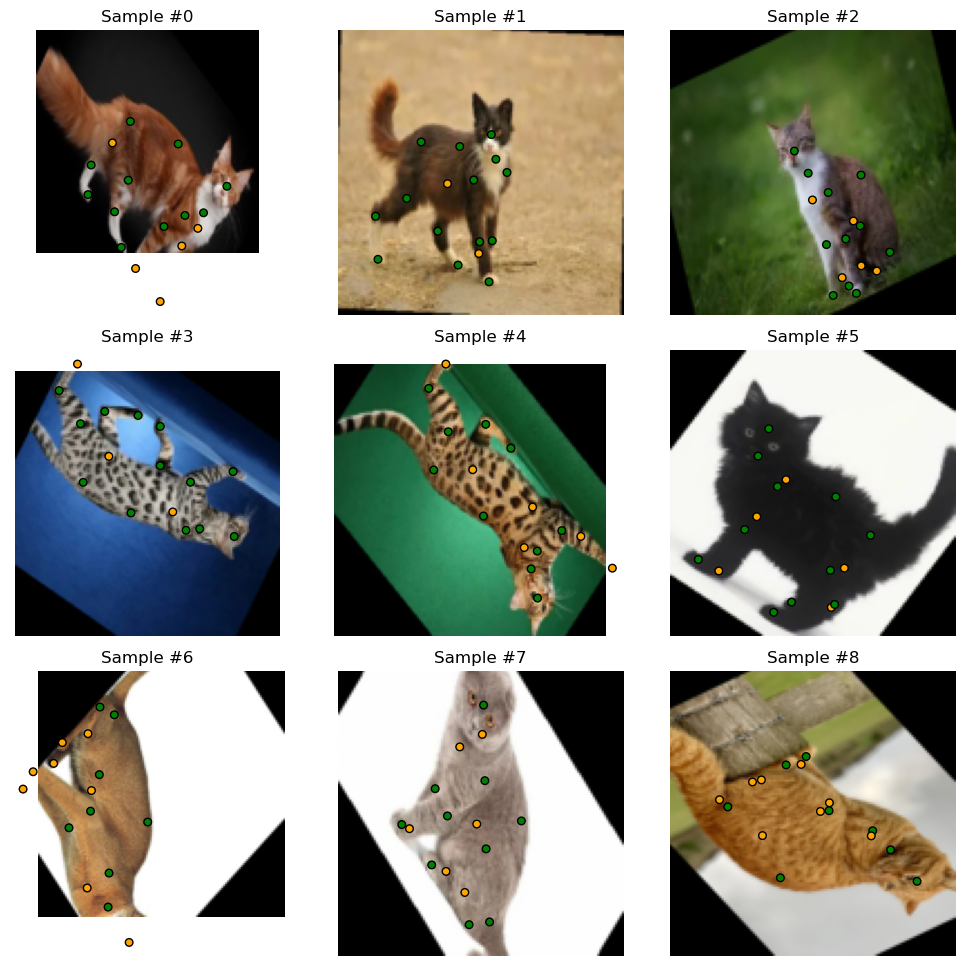

In [20]:
fig = plt.figure(figsize=(10, 10))

for i in range(9):
    sample = data[i]
    print(i,
          sample['image'].dtype,
          sample['image'].shape,
          sample['keypoints'].shape)
    ax = plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_keypoints(sample['image'].movedim(0, -1), sample['keypoints'][0], False)
plt.show()